In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor


In [ ]:
train_df = pd.read_csv('train.csv')

In [ ]:
cat = train_df.select_dtypes(include='O')
cat.columns

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [ ]:
train_df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [ ]:
train_df.describe()


,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
train_df = train_df[train_df['Prod. year']>=1990]

##Visualization


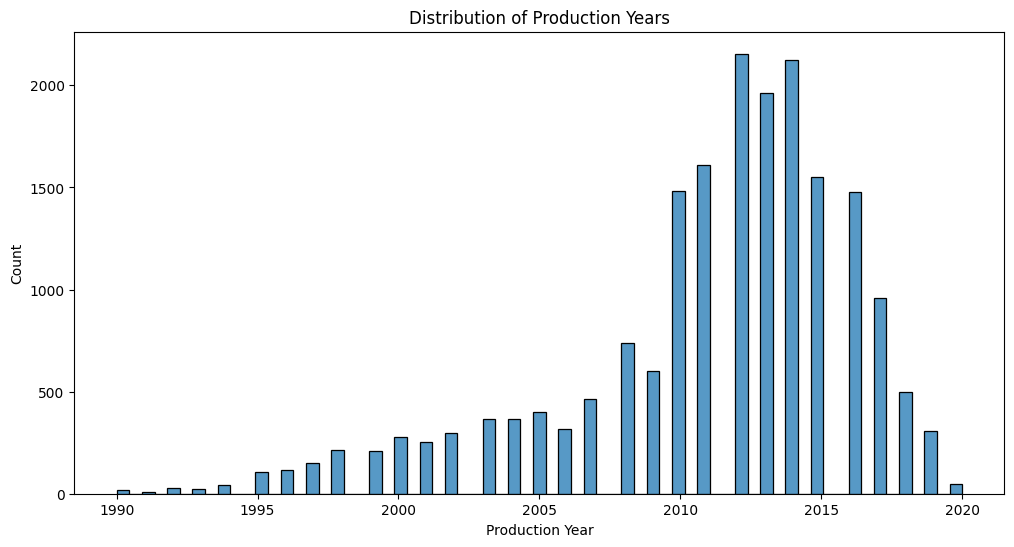

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(train_df['Prod. year'])
plt.title('Distribution of Production Years')
plt.xlabel('Production Year')
plt.ylabel('Count')
plt.show()

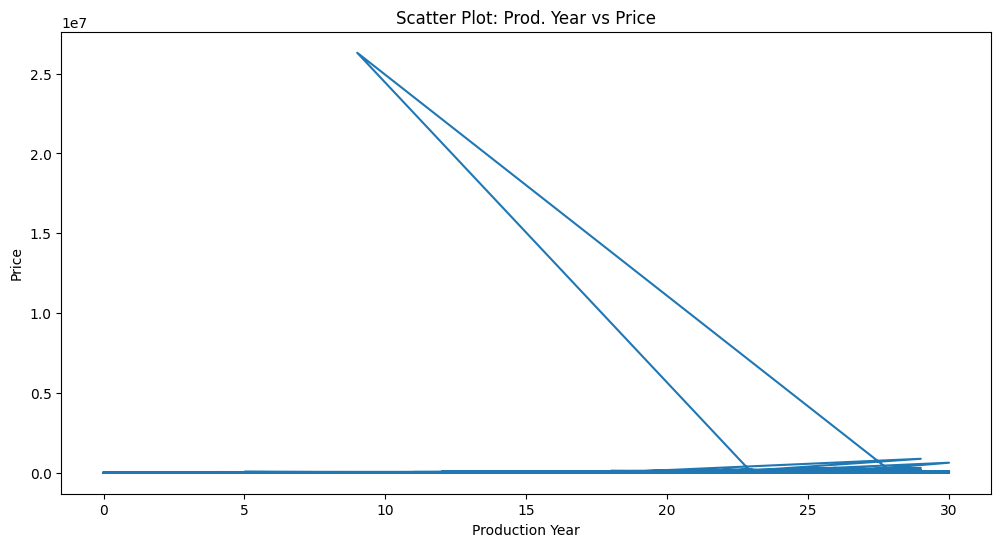

In [ ]:
train_df['Years Since 1990'] = train_df['Prod. year'] - 1990

plt.figure(figsize=(12, 6))
plt.plot(train_df['Years Since 1990'], train_df['Price'])

plt.title('Scatter Plot: Prod. Year vs Price')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.show()


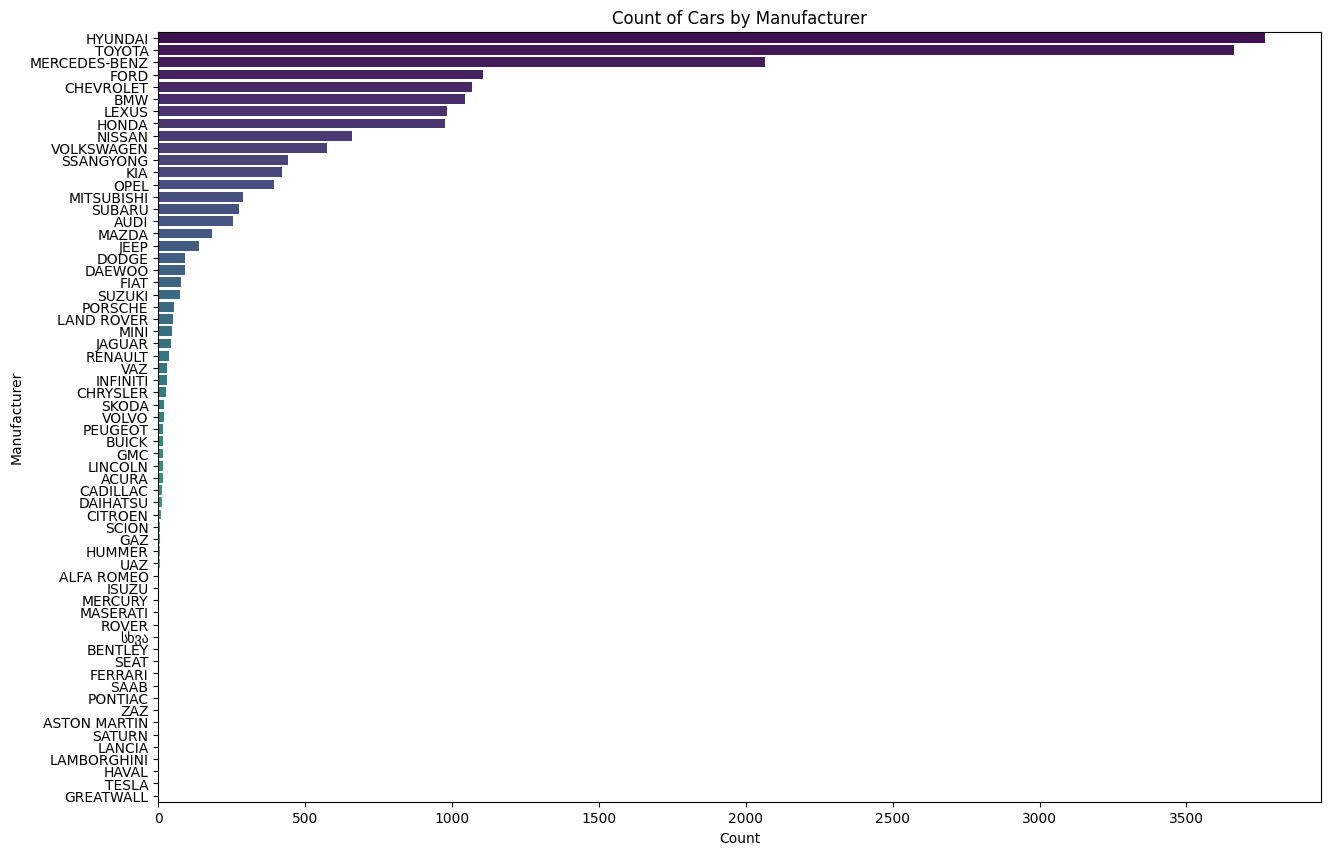

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Manufacturer', data=train_df, order = train_df['Manufacturer'].value_counts().index, palette='viridis')
plt.title('Count of Cars by Manufacturer')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

In [ ]:
# Get the counts of each unique value in the 'Manufacturer' column
manufacturer_counts = train_df['Manufacturer'].value_counts()

# Filter rows where the count is less than or equal to 10
filtered_train_df = train_df[train_df['Manufacturer'].isin(manufacturer_counts[manufacturer_counts <= 10].index)]


filtered_train_df = train_df[train_df['Manufacturer'].isin(manufacturer_counts[manufacturer_counts >= 50].index)]


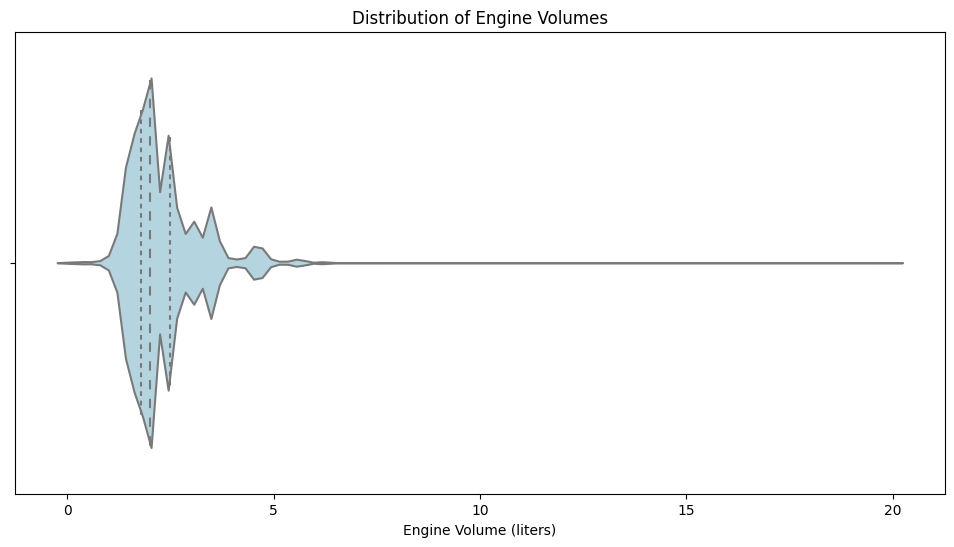

In [ ]:
filtered_train_df['Engine volume'] = filtered_train_df['Engine volume'].str.replace(' Turbo', '').astype(float)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Engine volume', data=filtered_train_df, inner='quartile', color='lightblue')
plt.title('Distribution of Engine Volumes')
plt.xlabel('Engine Volume (liters)')
plt.show()

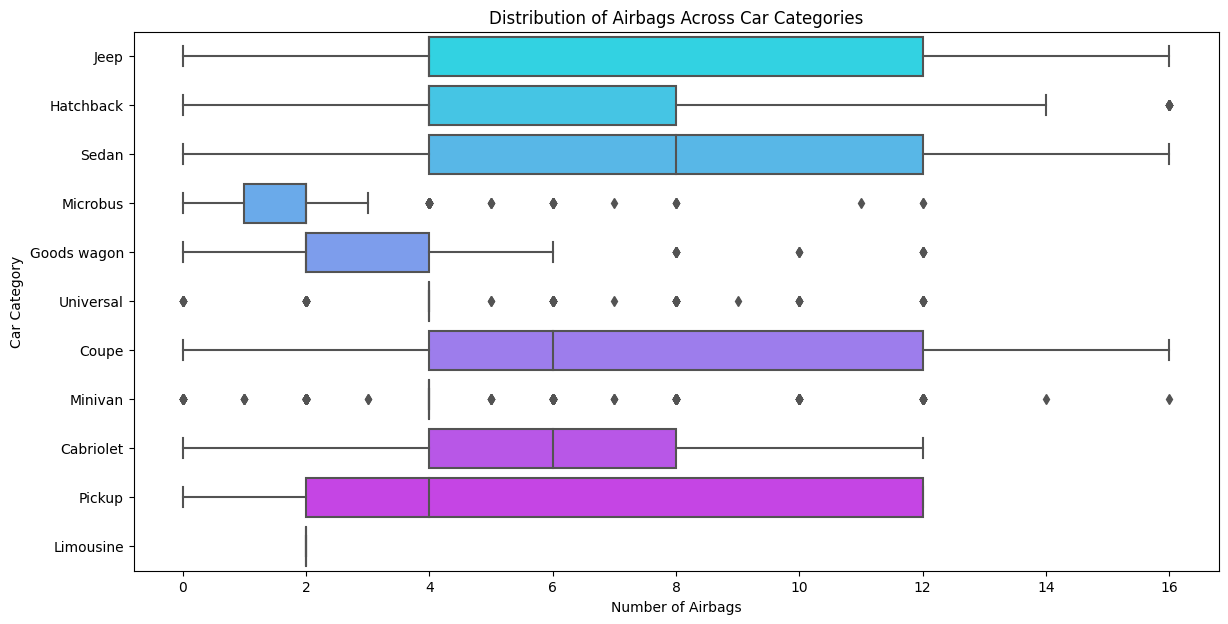

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Airbags', y='Category', data=filtered_train_df, palette='cool')
plt.title('Distribution of Airbags Across Car Categories')
plt.xlabel('Number of Airbags')
plt.ylabel('Car Category')
plt.show()

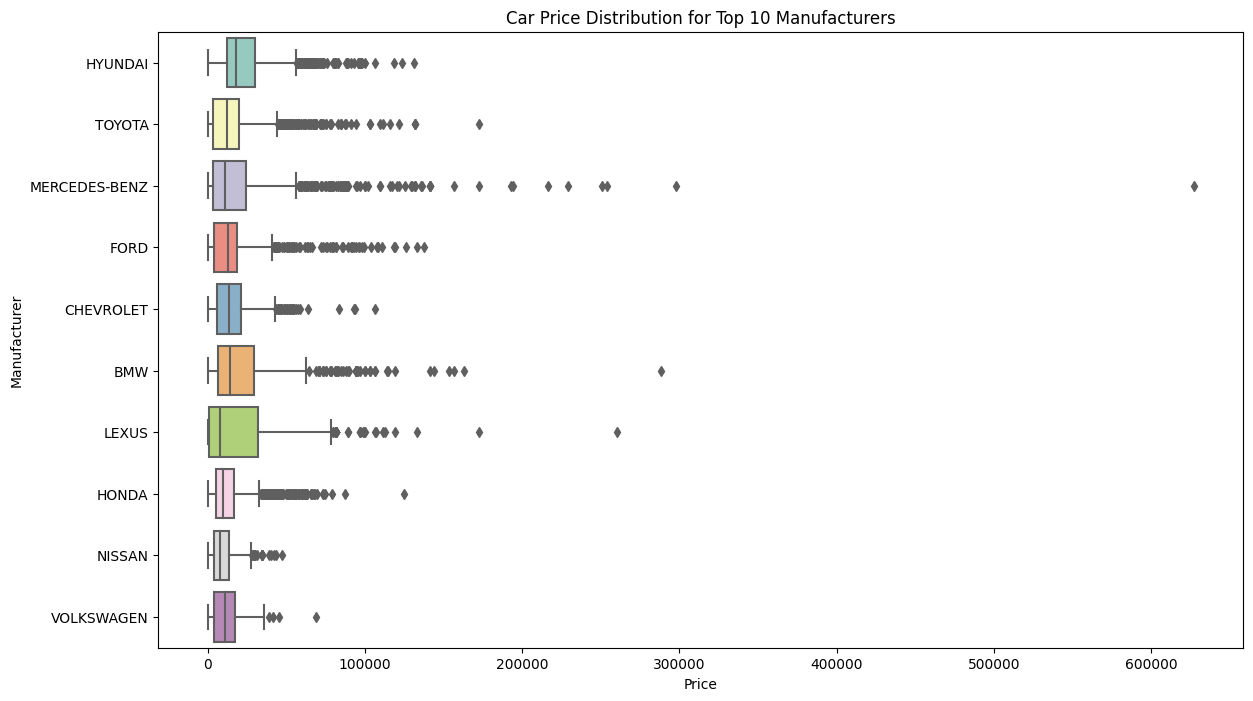

In [ ]:
top_manufacturers = train_df['Manufacturer'].value_counts().head(10).index
data_top_manufacturers = train_df[train_df['Manufacturer'].isin(top_manufacturers)]
plt.figure(figsize=(14, 8))
sns.boxplot(y='Manufacturer', x='Price', data=data_top_manufacturers, order=top_manufacturers, palette='Set3')
plt.title('Car Price Distribution for Top 10 Manufacturers')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.show()

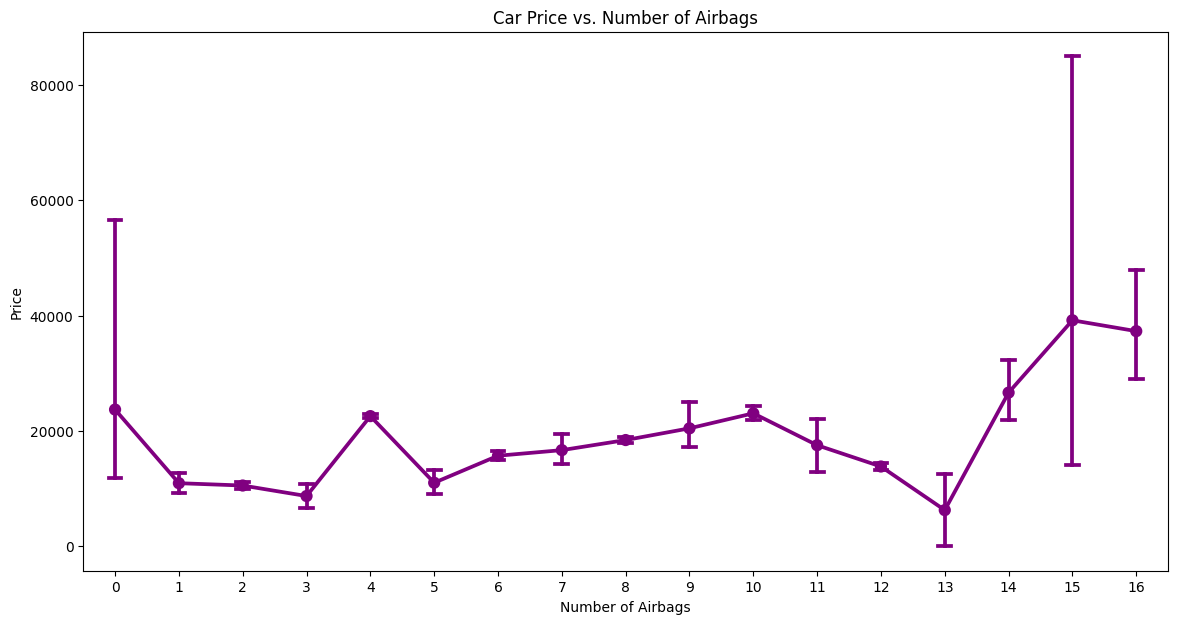

In [ ]:
plt.figure(figsize=(14, 7))
sns.pointplot(x='Airbags', y='Price', data=train_df, capsize=.2, color='purple')
plt.title('Car Price vs. Number of Airbags')
plt.xlabel('Number of Airbags')
plt.ylabel('Price')
plt.show()

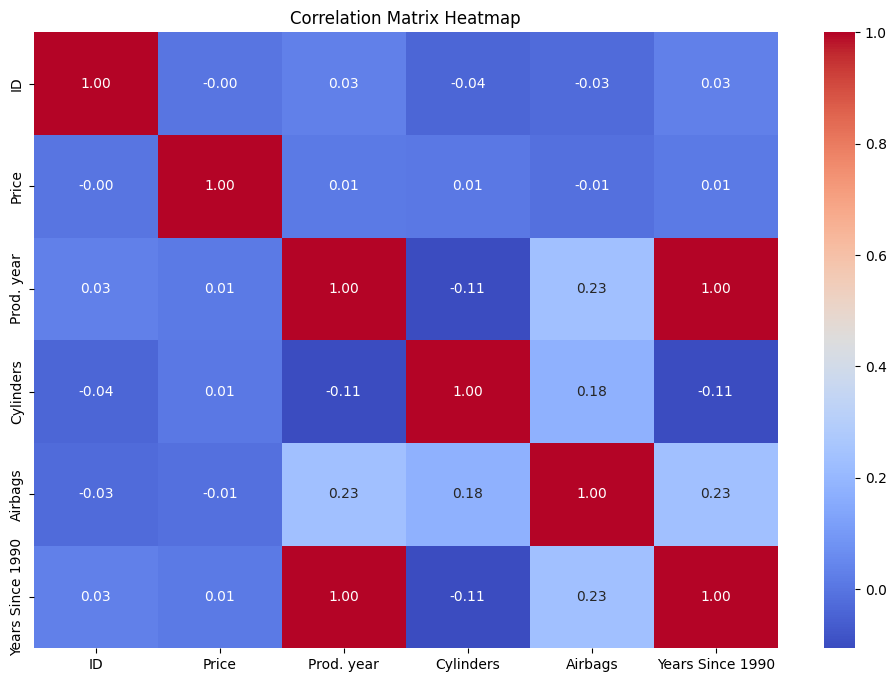

In [ ]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

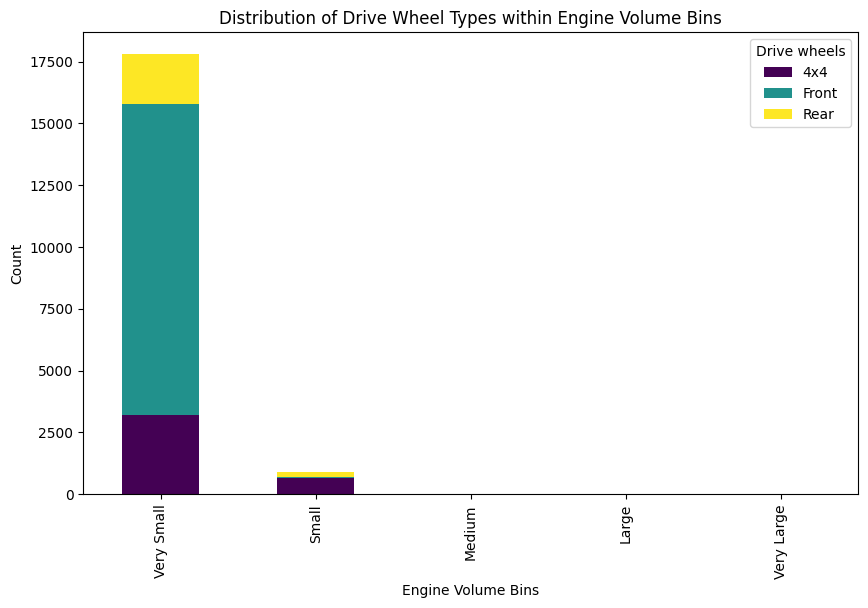

In [ ]:
engine_volume_bins = pd.cut(filtered_train_df['Engine volume'], bins=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
stacked_data = train_df.groupby([engine_volume_bins, 'Drive wheels']).size().unstack().fillna(0)
stacked_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Distribution of Drive Wheel Types within Engine Volume Bins')
plt.xlabel('Engine Volume Bins')
plt.ylabel('Count')
plt.legend(title='Drive wheels', loc='upper right')
plt.show()

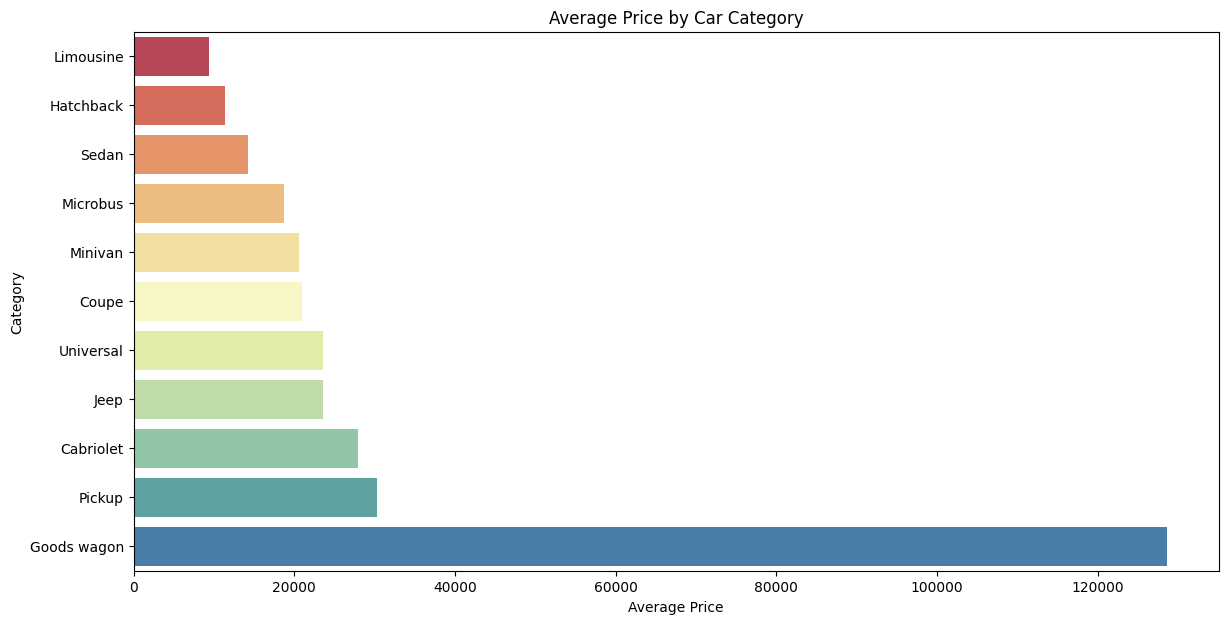

In [ ]:
plt.figure(figsize=(14, 7))
avg_price_category = filtered_train_df.groupby('Category')['Price'].mean().sort_values()
sns.barplot(x=avg_price_category.values, y=avg_price_category.index, palette='Spectral')
plt.title('Average Price by Car Category')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.show()

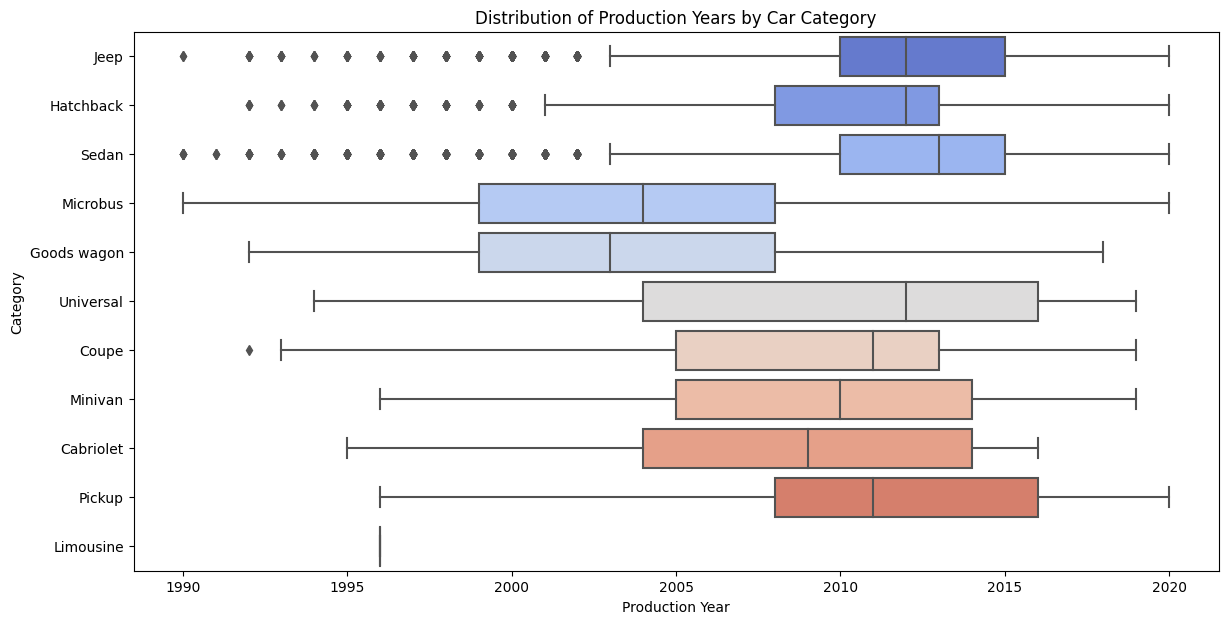

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(y='Category', x='Prod. year', data=filtered_train_df, palette='coolwarm')
plt.title('Distribution of Production Years by Car Category')
plt.xlabel('Production Year')
plt.ylabel('Category')
plt.show()

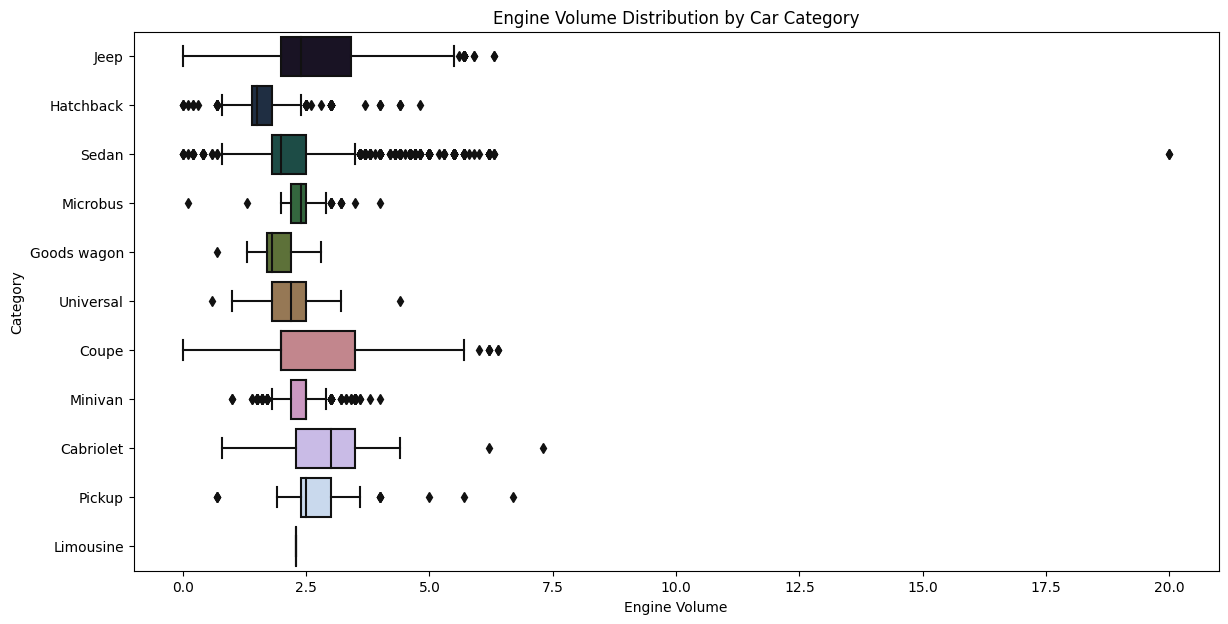

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(y='Category', x='Engine volume', data=filtered_train_df, palette='cubehelix')
plt.title('Engine Volume Distribution by Car Category')
plt.xlabel('Engine Volume')
plt.ylabel('Category')
plt.show()

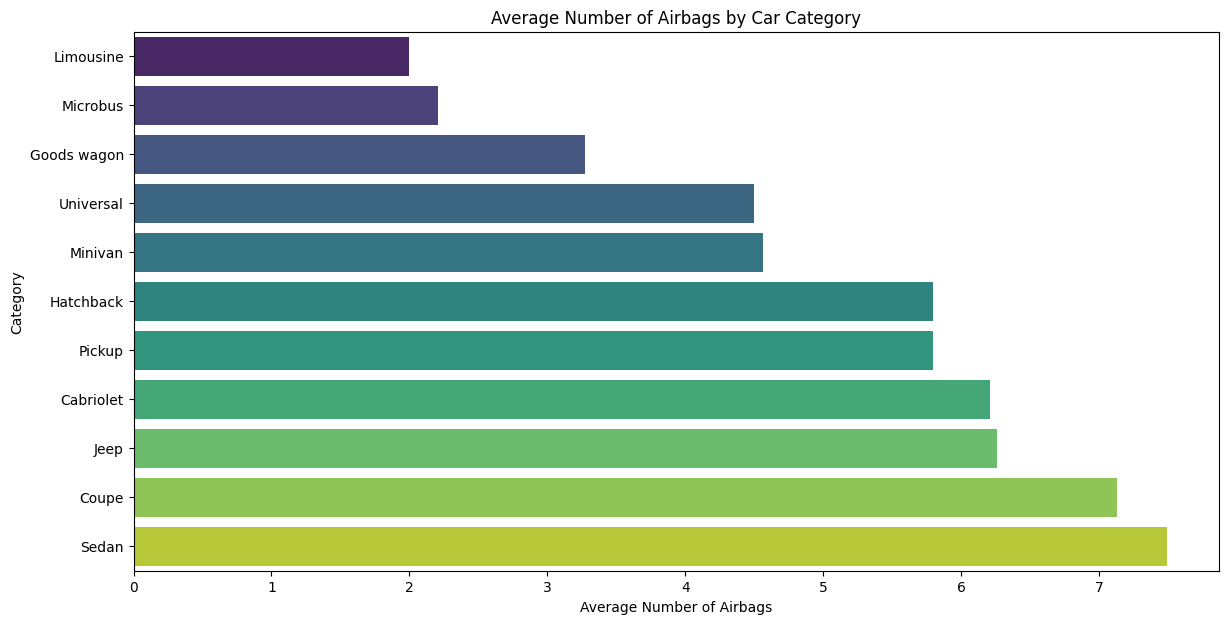

In [ ]:
plt.figure(figsize=(14, 7))
avg_airbags_category = filtered_train_df.groupby('Category')['Airbags'].mean().sort_values()
sns.barplot(x=avg_airbags_category.values, y=avg_airbags_category.index, palette='viridis')
plt.title('Average Number of Airbags by Car Category')
plt.xlabel('Average Number of Airbags')
plt.ylabel('Category')
plt.show()

In [ ]:
filtered_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18691 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18691 non-null  int64  
 1   Price             18691 non-null  int64  
 2   Levy              18691 non-null  object 
 3   Manufacturer      18691 non-null  object 
 4   Model             18691 non-null  object 
 5   Prod. year        18691 non-null  int64  
 6   Category          18691 non-null  object 
 7   Leather interior  18691 non-null  object 
 8   Fuel type         18691 non-null  object 
 9   Engine volume     18691 non-null  float64
 10  Mileage           18691 non-null  object 
 11  Cylinders         18691 non-null  float64
 12  Gear box type     18691 non-null  object 
 13  Drive wheels      18691 non-null  object 
 14  Doors             18691 non-null  object 
 15  Wheel             18691 non-null  object 
 16  Color             18691 non-null  object

##Preprocessing

In [ ]:
filtered_train_df.drop_duplicates(inplace=True)

In [ ]:
train_df = filtered_train_df

In [ ]:
train_df['Levy'] = pd.to_numeric(train_df['Levy'], errors='coerce')
mean = train_df['Levy'].mean()
train_df['Levy'] = train_df['Levy'].fillna(mean, inplace=True)

train_df.replace({'rover':'land rover'}, inplace=True)

train_df['Mileage'] = train_df['Mileage'].str.replace('km','')
train_df['Mileage'] = train_df['Mileage'].astype(int)
train_df = train_df[train_df['Price']<=400000]
train_df.drop(['ID','Doors','Prod. year'],axis=1, inplace=True)

##Feature Engineering


In [ ]:
cat = train_df.select_dtypes(include='O')


le = LabelEncoder()
encode = list(cat)
train_df[encode] = train_df[encode].apply(lambda col: le.fit_transform(col))
train_df[encode]
print('ok')


ok


In [ ]:
train_df.select_dtypes(include='O').columns

Index([], dtype='object')

In [ ]:
train_df = train_df[train_df['Price']<=400000]

In [ ]:
target = np.log1p(train_df.Price)

features = train_df.drop('Price',axis=1)

scaler = StandardScaler()

In [ ]:
features.shape

(18384, 15)

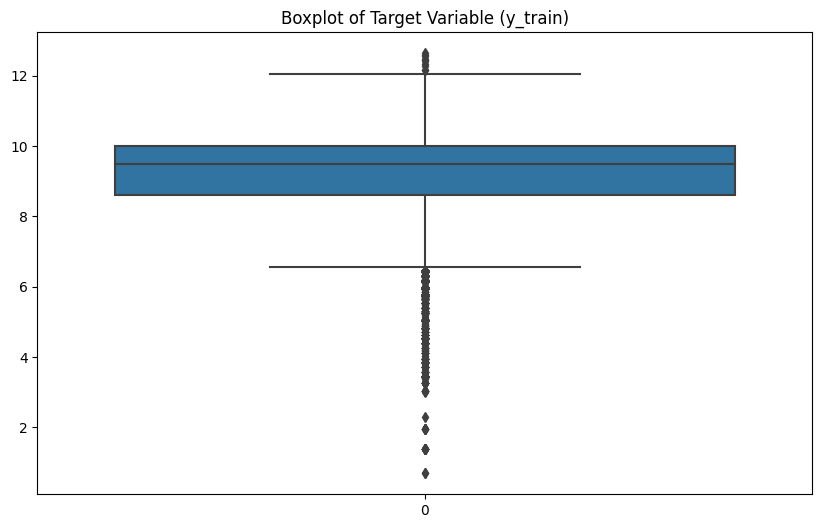

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_train is your target variable
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(np.log1p(train_df.Price))
plt.title('Boxplot of Target Variable (y_train)')
plt.show()


In [ ]:
#levy_median = train_df_encoded['Levy'].median()
#train_df_encoded['Levy'].fillna(0, inplace=True)
#train_df_encoded.isnull().sum()
train_df[encode]

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,0,11,1079,4,1,2,0,0,0,12
1,0,2,562,4,0,5,2,0,0,1
2,0,7,583,3,0,5,3,1,1,1
3,0,6,564,4,1,2,0,0,0,14
4,0,7,583,3,1,5,0,1,0,12
...,...,...,...,...,...,...,...,...,...,...
19232,0,13,324,1,1,0,1,2,0,12
19233,0,8,1150,9,1,5,2,1,0,11
19234,0,8,1247,4,1,1,0,1,0,7
19235,0,2,394,4,1,1,0,1,0,1


##Model Evaluation

In [ ]:
# from sklearn. ensemble import ExtraTreesRegressor
# etr = ExtraTreesRegressor(n_estimators=100, random_state=42) etr.fit(x, y)
# feature_importances = etr.feature_importances__ feature_importances_df = pd.DataFrame({
# })
# 'Feature': X.columns,
# 'Importance': feature_importances
# feature_importances_df feature_importances_df.sort_values (by Importance', ascending=False)
# # Display the top 20 most important features
# feature_importances_df.head(20)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    return X_train, X_test, y_train, y_test

def train_regressors(X_train, y_train):
    maxd = 20
    n = 100
    regressors = {
        'Linear': LinearRegression(),
        'DT': DecisionTreeRegressor(max_depth=maxd),
        'RF': RandomForestRegressor(n_estimators=n, max_depth=maxd),
        'GRADIENT': GradientBoostingRegressor(n_estimators=n, max_depth=maxd),
        'EXTRA': ExtraTreesRegressor(n_estimators=n, max_depth=maxd)
    }

    for regressor_name, regressor in regressors.items():
        regressor.fit(X_train, y_train)

    return regressors


In [ ]:
!pip install lightgbm
import lightgbm as lgb

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
def models_on_training_regression(X_train, X_test, y_train, y_test):


    # param_grids = {
    #     'Linear': {
    #       'fit_intercept': [True, False],
    #     },
    #     'DT': {
    #         'max_depth': [5, 10, 15],
    #     },
    #     'RF': {
    #         'n_estimators': [50, 100, 150],
    #         'max_depth': [5, 10, 15],
    #     },
    #     'GRADIENT': {
    #         'n_estimators': [50, 100, 150],
    #         'learning_rate': [0.1, 0.5, 1.0],
    #     },
    #     'EXTRA': {
    #         'max_depth': [3, 5, 7],
    #         'n_estimators': [100, 150, 200],
    #     },
    # }

    # Create regressors with default hyperparameters
    regressors = {
        'LR': LinearRegression(positive=True),
        'DT': DecisionTreeRegressor(max_depth=10,  criterion="friedman_mse",max_features="auto"),
        'RF': RandomForestRegressor(n_estimators= 100, max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf=1,
 min_samples_split = 2
 ),
        'Gradient': GradientBoostingRegressor(),
        'Extra': ExtraTreesRegressor(max_depth=20, n_estimators=150),
        'XGB': XGBRegressor(n_estimators=1000),
        'KNN':  KNeighborsRegressor(n_neighbors=5),
        'LGBM': lgb.LGBMRegressor(force_col_wise=True),
    }

    # scoring_metrics = {
    #     'Linear': 'neg_mean_squared_error',  # Use Mean Squared Error for Linear Regression
    #     'DT': 'neg_mean_squared_error',
    #     'RF': 'neg_mean_squared_error',
    #     'GRADIENT': 'r2',  # Use R-squared for Gradient Boosting
    #     'EXTRA': 'r2',     # Use R-squared for Extra Trees
    # }


    from sklearn.model_selection import cross_val_score

    scores={}
    # Assuming you have already trained the models using train_regressors
    for regressor_name, regressor in regressors.items():
        score = cross_val_score(regressor, X_train, y_train, cv=10)
        print(f"{regressor_name} - Mean Score: {score.mean():.2f}, Standard Deviation: {score.std()}")
        scores[regressor_name] = score
    for regressor_name, regressor in regressors.items():
        model = regressor
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        import math
        mse = metrics.mean_squared_error(y_pred,y_test)*100
        rmse = math.sqrt(mse)*100
        mae = metrics.mean_absolute_error(y_pred,y_test) *100
        vals = {
            'Type of Error': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error'],
            'Value of Error': [mse, rmse, mae]
        }
        print(pd.DataFrame(vals))
        true_color = 'b'  # Blue
        pred_color = 'r'  # Red

        plt.scatter(y_test, y_test, color=true_color, label='True Values')
        plt.scatter(y_test, y_pred, color=pred_color, label='Predicted Values')
        plt.xlabel("True Values (y_test)")
        plt.ylabel("Predicted Values (y_pred)")
        plt.title(f"True vs. Predicted Values {regressor_name}")

        # Create a legend to label the points
        plt.legend()
        plt.show()
    return scores, vals


LR - Mean Score: 0.08, Standard Deviation: 0.01188181159949307
DT - Mean Score: 0.41, Standard Deviation: 0.05277072669467634
RF - Mean Score: 0.51, Standard Deviation: 0.01751475040230521
Gradient - Mean Score: 0.45, Standard Deviation: 0.014474286137261524
Extra - Mean Score: 0.62, Standard Deviation: 0.033641086920175194
XGB - Mean Score: 0.55, Standard Deviation: 0.03596336478148334
KNN - Mean Score: 0.49, Standard Deviation: 0.03607570401662977
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 11581, number of used features: 14
[LightGBM] [Info] Start training from score 9.032962
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 11581, number of used features: 14
[LightGBM] [Info] Start training from score 9.032459
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 11581, number of used features: 14
[LightGBM] [Info] Start training from score 9.033088
[LightGBM

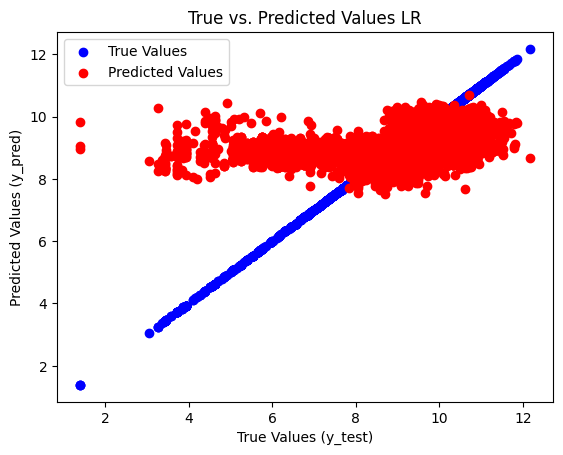

             Type of Error  Value of Error
0       Mean Squared Error      234.251362
1  Root Mean Squared Error     1530.527237
2      Mean Absolute Error       93.296043


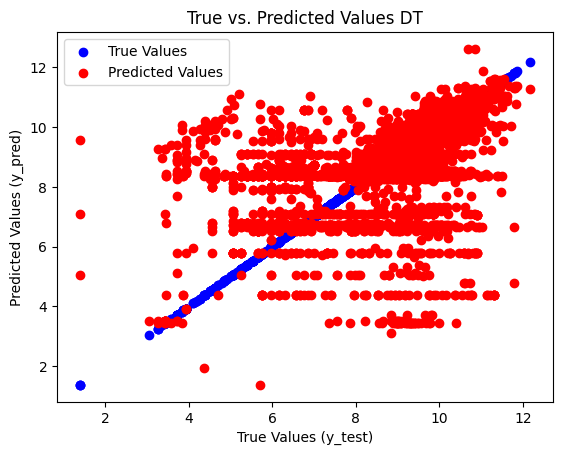

             Type of Error  Value of Error
0       Mean Squared Error      154.500697
1  Root Mean Squared Error     1242.983093
2      Mean Absolute Error       90.507041


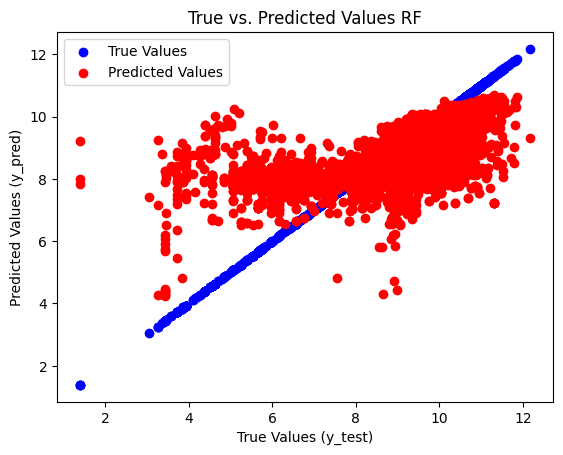

             Type of Error  Value of Error
0       Mean Squared Error      162.024599
1  Root Mean Squared Error     1272.888837
2      Mean Absolute Error       93.465323


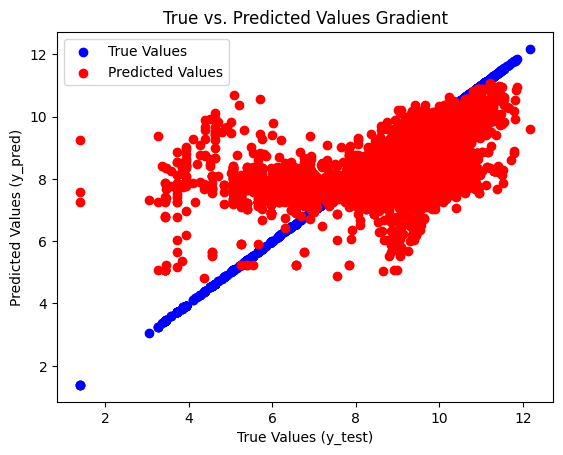

             Type of Error  Value of Error
0       Mean Squared Error      138.203552
1  Root Mean Squared Error     1175.600068
2      Mean Absolute Error       72.101157


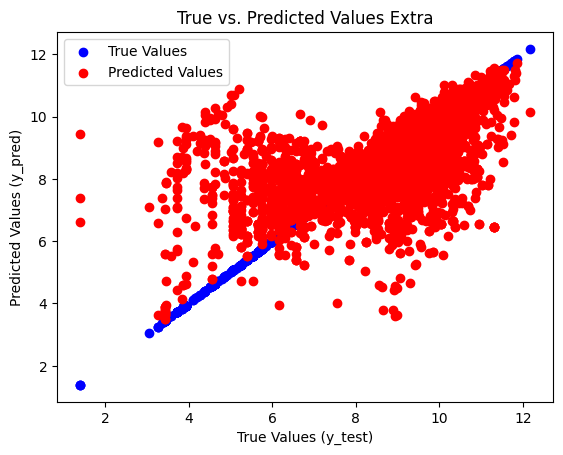

             Type of Error  Value of Error
0       Mean Squared Error      228.021946
1  Root Mean Squared Error     1510.039555
2      Mean Absolute Error      114.399028


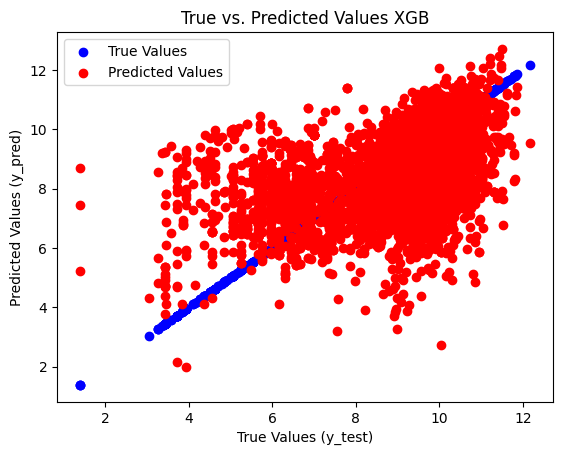

             Type of Error  Value of Error
0       Mean Squared Error      134.089703
1  Root Mean Squared Error     1157.971084
2      Mean Absolute Error       65.305931


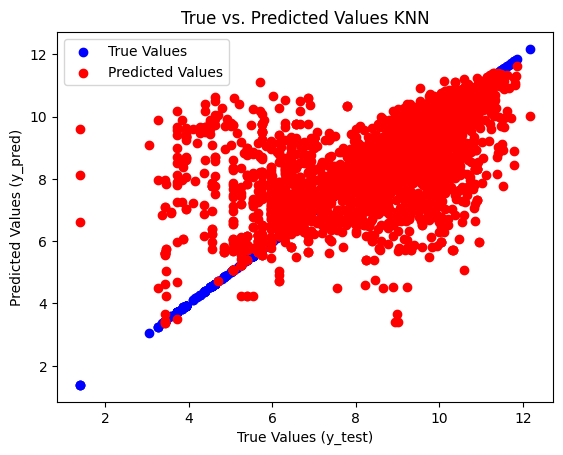

[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 12868, number of used features: 14
[LightGBM] [Info] Start training from score 9.032922
             Type of Error  Value of Error
0       Mean Squared Error      163.672213
1  Root Mean Squared Error     1279.344416
2      Mean Absolute Error       91.854830


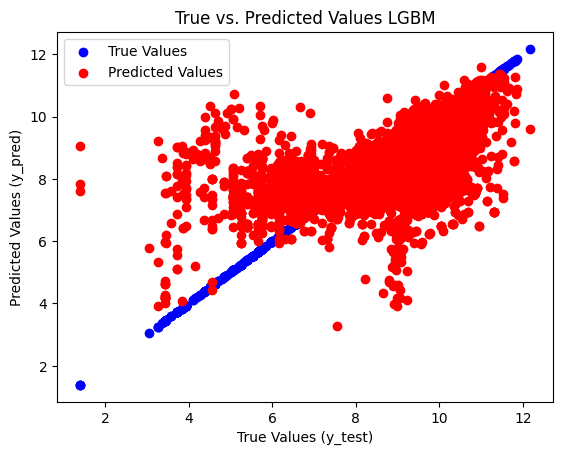

In [ ]:
X_train, X_test, y_train, y_test = split_data(features, target)
scores,vals = models_on_training_regression(X_train, X_test, y_train, y_test) #cv=5



In [ ]:
plt.scatter(y_test, y_test, color='r', label='True Values')

In [ ]:
vals

{'Type of Error': ['Mean Squared Error',
  'Root Mean Squared Error',
  'Mean Absolute Error'],
 'Value of Error': [163.67221349352505, 1279.3444160722518, 91.85483020290592]}

In [ ]:
X_train, X_test, y_train, y_test = split_data(features, target)
scores = models_on_training_regression(X_train, X_test, y_train, y_test) #cv=5

In [ ]:
features

In [ ]:
# cross(20,70)

In [ ]:
# def model(features,target,Test,random,scaler,n,maxd):
#     x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=Test, random_state=random)


#     print('Size Split Train:',x_train.shape, x_test.shape)
#     print('Size Split Test:', y_train.shape, y_test.shape)
#     print()
#     print()

#     regression = {
#         'DECISION':DecisionTreeRegressor(max_depth=maxd),
#         'FOREST':RandomForestRegressor(n_estimators=n, max_depth=maxd),
#         'GRADIENT':GradientBoostingRegressor(n_estimators=n,max_depth=maxd),
#         'EXTRA':ExtraTreesRegressor(n_estimators=n,max_depth=maxd)
#     }

#     for nome, model in regression.items():
#         print('-><-'*20)
#         print('Nome:', nome)

#         model.fit(x_train, y_train)
#         y_pred = model.predict(x_train)
#         print('Train Score:', model.score(x_train, y_train))
#         print('Test Score:', model.score(x_test, y_test))

#         plt.scatter(y_train, y_pred, c='green')
#         plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()], c='blue')
#         plt.xlabel('Current Value')
#         plt.ylabel('Predicted Value')
#         plt.show()
# print('ok')

In [ ]:
# model(features, target, 0.2, 42,scaler,70, 20)